# Multi-Layer Neural Network

In this notebook, I implemented a multi-layer neural network in tensorflow to classify MNIST dataset. Detailed explanations are available in simple_neural_network notebook.

## Import required libraries

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Read input data and allocate placeholders

In [2]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)
x = tf.placeholder(tf.float32, [None, 784])
y_actual = tf.placeholder(tf.float32, [None, 10])

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Define learning parameters
The current architecture has 784 nodes in the input layer, 200 nodes in the first hidden layer, 150 nodes in the second hidden layer, and 10 nodes in the output layer

In [3]:
weights = {'h1': tf.Variable(tf.random_normal([784, 200])),
           'h2': tf.Variable(tf.random_normal([200, 150])),
           'out': tf.Variable(tf.random_normal([150, 10]))
          }

bias = {'h1': tf.Variable(tf.random_normal([200])),
        'h2': tf.Variable(tf.random_normal([150])),
        'out': tf.Variable(tf.random_normal([10]))
       }

## Define model

In [4]:
def nn(image_vector):
    layer_1 = tf.add(tf.matmul(image_vector, weights['h1']), bias['h1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), bias['h2'])
    out = tf.add(tf.matmul(layer_2, weights['out']), bias['out'])
    return out

## Train model: Define and optimize loss function
Using cross entropy as the loss function, and gradient descent as the the optimization technique to minimize the loss


In [5]:
y = nn(x)
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_actual))
optimizer = tf.train.GradientDescentOptimizer(0.01)
model = optimizer.minimize(cross_entropy_loss)

## Start tensorflow session

In [6]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

## Running epochs to train model

In [7]:
errors = []
for i in range(500):
    batch_x, batch_y = mnist.train.next_batch(1000)
    sess.run(model, feed_dict={x: batch_x, y_actual: batch_y})
    err = sess.run(cross_entropy_loss, feed_dict={x: batch_x, y_actual: batch_y})
    errors.append(err)
    print("Epoch: ", i, "Loss: ", err)

Epoch:  0 Loss:  2154.5564
Epoch:  1 Loss:  1897.298
Epoch:  2 Loss:  1191.2517
Epoch:  3 Loss:  1060.3665
Epoch:  4 Loss:  803.49976
Epoch:  5 Loss:  618.89813
Epoch:  6 Loss:  338.2317
Epoch:  7 Loss:  269.57312
Epoch:  8 Loss:  262.91577
Epoch:  9 Loss:  297.61954
Epoch:  10 Loss:  290.85883
Epoch:  11 Loss:  255.0128
Epoch:  12 Loss:  167.51665
Epoch:  13 Loss:  158.76505
Epoch:  14 Loss:  136.49069
Epoch:  15 Loss:  143.26384
Epoch:  16 Loss:  141.49684
Epoch:  17 Loss:  126.44075
Epoch:  18 Loss:  108.474236
Epoch:  19 Loss:  110.42686
Epoch:  20 Loss:  135.68425
Epoch:  21 Loss:  146.4522
Epoch:  22 Loss:  117.695465
Epoch:  23 Loss:  115.86784
Epoch:  24 Loss:  126.07663
Epoch:  25 Loss:  132.34642
Epoch:  26 Loss:  118.69037
Epoch:  27 Loss:  116.91822
Epoch:  28 Loss:  121.23917
Epoch:  29 Loss:  101.35165
Epoch:  30 Loss:  98.681526
Epoch:  31 Loss:  99.7585
Epoch:  32 Loss:  109.02023
Epoch:  33 Loss:  84.21812
Epoch:  34 Loss:  99.99926
Epoch:  35 Loss:  103.13645
Epoch:  

Epoch:  295 Loss:  28.278675
Epoch:  296 Loss:  29.17456
Epoch:  297 Loss:  21.922693
Epoch:  298 Loss:  25.560375
Epoch:  299 Loss:  31.533772
Epoch:  300 Loss:  23.854847
Epoch:  301 Loss:  23.988382
Epoch:  302 Loss:  21.638824
Epoch:  303 Loss:  22.579914
Epoch:  304 Loss:  25.19655
Epoch:  305 Loss:  28.589104
Epoch:  306 Loss:  27.86859
Epoch:  307 Loss:  22.537628
Epoch:  308 Loss:  22.260824
Epoch:  309 Loss:  28.910099
Epoch:  310 Loss:  23.695278
Epoch:  311 Loss:  32.15475
Epoch:  312 Loss:  27.266981
Epoch:  313 Loss:  23.113817
Epoch:  314 Loss:  28.951553
Epoch:  315 Loss:  28.587082
Epoch:  316 Loss:  21.304018
Epoch:  317 Loss:  20.89572
Epoch:  318 Loss:  25.381426
Epoch:  319 Loss:  27.91757
Epoch:  320 Loss:  27.39943
Epoch:  321 Loss:  29.155554
Epoch:  322 Loss:  32.01486
Epoch:  323 Loss:  21.372894
Epoch:  324 Loss:  19.906116
Epoch:  325 Loss:  27.932964
Epoch:  326 Loss:  21.59209
Epoch:  327 Loss:  35.79922
Epoch:  328 Loss:  27.272675
Epoch:  329 Loss:  23.23

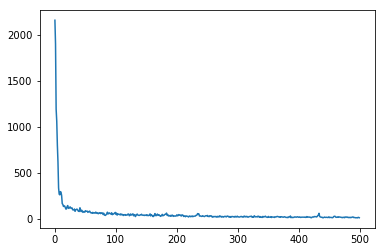

In [8]:
plt.plot(range(500), errors)

## Evaluate model on test set

In [9]:
corr_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_actual, 1))
accuracy = tf.reduce_mean(tf.cast(corr_pred, tf.float32))
print("Model Accuracy on test set: ", sess.run(accuracy, feed_dict={x: mnist.test.images, y_actual: mnist.test.labels}))

Model Accuracy on test set:  0.8821
